#CHE1147H - Data Mining in Engineering

#Programming assignment - 3

#Student name: **Ashutosh Desai**

#Student number: **1004774041**

##1. Feature Engineeering

###1.1 Import the data and create the anchor date columns

In [ ]:
#1.
import pandas as pd
txn = pd.read_csv('Retail_Data_Transactions.csv')
txn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


'txn' dataset contains **125000** rows.

In [ ]:
#2.
txn['txn_date'] = pd.to_datetime(txn['trans_date'])
txn.drop(columns=['trans_date'],inplace=True)
txn

,customer_id,tran_amount,txn_date
0,CS5295,35,2013-02-11
1,CS4768,39,2015-03-15
2,CS2122,52,2013-02-26
3,CS1217,99,2011-11-16
4,CS1850,78,2013-11-20
...,...,...,...
124995,CS8433,64,2011-06-26
124996,CS7232,38,2014-08-19
124997,CS8731,42,2014-11-28
124998,CS8133,13,2013-12-14


In [ ]:
#3.
print('min() of ''txn_date'' : ',txn['txn_date'].min())
print('max() of ''txn_date'' : ',txn['txn_date'].max())

min() of txn_date :  2011-05-16 00:00:00
max() of txn_date :  2015-03-16 00:00:00


In [ ]:
#4.
from pandas.tseries.offsets import DateOffset

temp_list = []
for dates in txn['txn_date']:
  Day = dates.day
  Month = dates.month
  if Month in [1,3,5,7,8,10,12]:
    temp_list.append(dates + DateOffset(days = (31-Day)))
  elif Month == 2:
    temp_list.append(dates + DateOffset(days = (28-Day)))
  else:
    temp_list.append(dates + DateOffset(days = (30-Day)))

In [ ]:
txn['ME_DT'] = temp_list
txn

,customer_id,tran_amount,txn_date,ME_DT
0,CS5295,35,2013-02-11,2013-02-28
1,CS4768,39,2015-03-15,2015-03-31
2,CS2122,52,2013-02-26,2013-02-28
3,CS1217,99,2011-11-16,2011-11-30
4,CS1850,78,2013-11-20,2013-11-30
...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30
124996,CS7232,38,2014-08-19,2014-08-31
124997,CS8731,42,2014-11-28,2014-11-30
124998,CS8133,13,2013-12-14,2013-12-31


In [ ]:
#5.
txn['YEAR'] = pd.DatetimeIndex(txn['txn_date']).year
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


In [ ]:
txn[55:60]

,customer_id,tran_amount,txn_date,ME_DT,YEAR
55,CS2662,88,2014-08-31,2014-08-31,2014
56,CS2209,35,2012-03-12,2012-03-31,2012
57,CS4530,40,2011-06-05,2011-06-30,2011
58,CS2848,53,2013-02-04,2013-02-28,2013
59,CS2596,55,2011-09-19,2011-09-30,2011


The slicing above matched exactly to the image shown in the question paper.

###1.2 Create features that capture annual spending

In [ ]:
import numpy as np

In [ ]:
#1.
clnt_annual_aggregations = txn.groupby(['customer_id','YEAR']).agg(
    ann_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc=np.sum),
    ann_txn_amt_ave=pd.NamedAgg(column="tran_amount", aggfunc=np.mean),
    ann_txn_amt_std=pd.NamedAgg(column="tran_amount", aggfunc=np.std),
    ann_txn_amt_var=pd.NamedAgg(column="tran_amount", aggfunc=np.var),
    ann_txn_amt_sem=pd.NamedAgg(column="tran_amount", aggfunc='sem'),
    ann_txn_amt_max=pd.NamedAgg(column="tran_amount", aggfunc=np.max),
    ann_txn_amt_min=pd.NamedAgg(column="tran_amount", aggfunc=np.min),
    ann_txn_amt_cnt=pd.NamedAgg(column="tran_amount", aggfunc='count'),
)

In [ ]:
clnt_annual_aggregations

ann_txn_amt_sum  ...  ann_txn_amt_cnt
customer_id YEAR                   ...                 
CS1112      2011              212  ...                3
            2012              337  ...                5
            2013              212  ...                3
            2014              212  ...                3
            2015               39  ...                1
...                           ...  ...              ...
CS9000      2011               39  ...                2
            2012              216  ...                4
            2013              147  ...                2
            2014               97  ...                4
            2015               34  ...                1

[31140 rows x 8 columns]

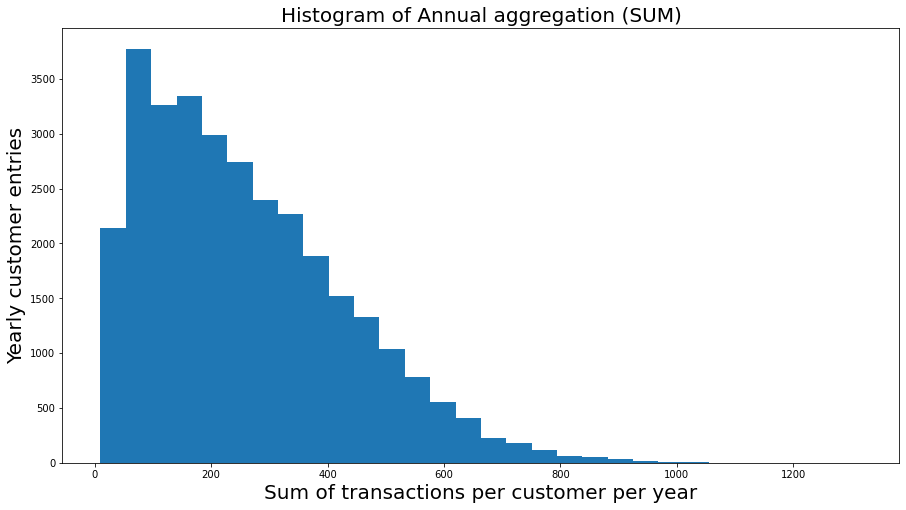

In [ ]:
#2.
import matplotlib.pyplot as plt
clnt_annual_aggregations.hist(column='ann_txn_amt_sum',bins=30,figsize=(15,8))
plt.title('Histogram of Annual aggregation (SUM)',fontsize=20)
plt.xlabel('Sum of transactions per customer per year',fontsize=20)
plt.ylabel('Yearly customer entries',fontsize=20)
plt.grid()
plt.savefig('Fig_1.2.2_a_Desai_Ashutosh.png')

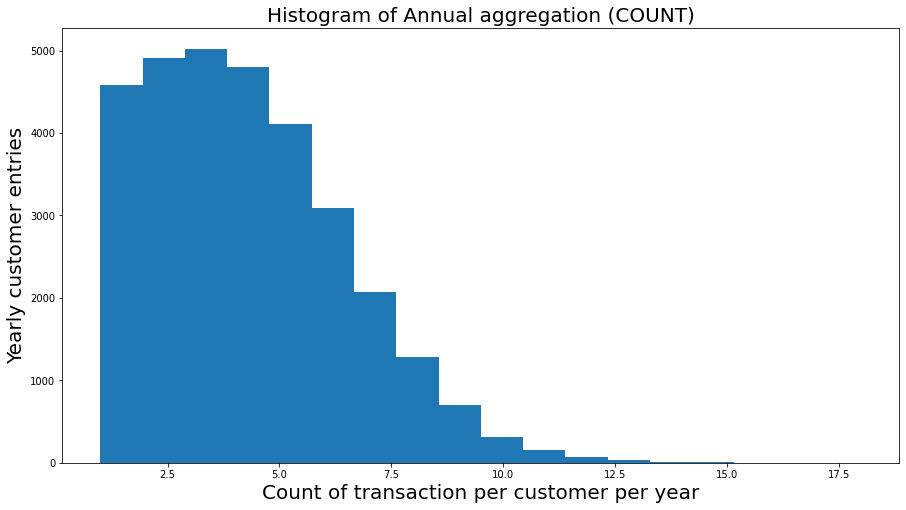

In [ ]:
clnt_annual_aggregations.hist(column='ann_txn_amt_cnt',bins=18,figsize=(15,8))
plt.title('Histogram of Annual aggregation (COUNT)',fontsize=20)
plt.xlabel('Count of transaction per customer per year',fontsize=20)
plt.ylabel('Yearly customer entries',fontsize=20)
plt.grid()
plt.savefig('Fig_1.2.2_b_Desai_Ashutosh.png')

In [ ]:
#3.
clnt_annual_aggregations.reset_index(inplace=True)
clnt_annual_aggregations

,customer_id,YEAR,ann_txn_amt_sum,ann_txn_amt_ave,ann_txn_amt_std,ann_txn_amt_var,ann_txn_amt_sem,ann_txn_amt_max,ann_txn_amt_min,ann_txn_amt_cnt
0,CS1112,2011,212,70.666667,22.030282,485.333333,12.719189,96,56,3
1,CS1112,2012,337,67.400000,12.720063,161.800000,5.688585,81,52,5
2,CS1112,2013,212,70.666667,34.501208,1190.333333,19.919282,105,36,3
3,CS1112,2014,212,70.666667,16.862186,284.333333,9.735388,90,59,3
4,CS1112,2015,39,39.000000,NaN,NaN,NaN,39,39,1
...,...,...,...,...,...,...,...,...,...,...
31135,CS9000,2011,39,19.500000,4.949747,24.500000,3.500000,23,16,2
31136,CS9000,2012,216,54.000000,16.772994,281.333333,8.386497,77,37,4
31137,CS9000,2013,147,73.500000,3.535534,12.500000,2.500000,76,71,2
31138,CS9000,2014,97,24.250000,8.261356,68.250000,4.130678,35,16,4


In [ ]:
clnt_annual_aggregations_pivot = clnt_annual_aggregations.pivot_table(index='customer_id', columns='YEAR',dropna=False,fill_value=0)
clnt_annual_aggregations_pivot

ann_txn_amt_ave             ... ann_txn_amt_var            
YEAR                   2011       2012  ...            2014        2015
customer_id                             ...                            
CS1112            70.666667  67.400000  ...      284.333333    0.000000
CS1113            81.333333  74.800000  ...      781.666667  745.333333
CS1114            85.200000  75.000000  ...      726.166667    0.000000
CS1115            87.000000  67.571429  ...      512.250000    0.000000
CS1116            58.750000  76.666667  ...      636.800000    0.000000
...                     ...        ...  ...             ...         ...
CS8996            31.000000  33.666667  ...      481.600000    0.000000
CS8997            45.000000  39.500000  ...       18.000000    0.000000
CS8998            64.000000  54.400000  ...      219.666667    0.000000
CS8999            52.000000  25.250000  ...       18.000000    0.000000
CS9000            19.500000  54.000000  ...       68.250000    0.000000

[6889 rows x 40 columns]

In [ ]:
clnt_annual_aggregations_pivot.columns.nlevels

2

In [ ]:
clnt_annual_aggregations_pivot.columns

MultiIndex([('ann_txn_amt_ave', 2011),
            ('ann_txn_amt_ave', 2012),
            ('ann_txn_amt_ave', 2013),
            ('ann_txn_amt_ave', 2014),
            ('ann_txn_amt_ave', 2015),
            ('ann_txn_amt_cnt', 2011),
            ('ann_txn_amt_cnt', 2012),
            ('ann_txn_amt_cnt', 2013),
            ('ann_txn_amt_cnt', 2014),
            ('ann_txn_amt_cnt', 2015),
            ('ann_txn_amt_max', 2011),
            ('ann_txn_amt_max', 2012),
            ('ann_txn_amt_max', 2013),
            ('ann_txn_amt_max', 2014),
            ('ann_txn_amt_max', 2015),
            ('ann_txn_amt_min', 2011),
            ('ann_txn_amt_min', 2012),
            ('ann_txn_amt_min', 2013),
            ('ann_txn_amt_min', 2014),
            ('ann_txn_amt_min', 2015),
            ('ann_txn_amt_sem', 2011),
            ('ann_txn_amt_sem', 2012),
            ('ann_txn_amt_sem', 2013),
            ('ann_txn_amt_sem', 2014),
            ('ann_txn_amt_sem', 2015),
            ('ann_txn_amt

The columns have a hierarchial nomenclature having 2 levels. The **first** level is titles like **'ann_txn_amt_ave', 'ann_txn_amt_sum', 'ann_txn_amt_count'** etc. The **second** level includes years from **2011 to 2015**. Hence, each first level title includes all the second level titles. So, we have number of columns that equal to 1st level titles times the 2nd level titles (8*5 = 40).

In [ ]:
#5.
level_0 = clnt_annual_aggregations_pivot.columns.get_level_values(0).astype(str)
level_0

Index(['ann_txn_amt_ave', 'ann_txn_amt_ave', 'ann_txn_amt_ave',
       'ann_txn_amt_ave', 'ann_txn_amt_ave', 'ann_txn_amt_cnt',
       'ann_txn_amt_cnt', 'ann_txn_amt_cnt', 'ann_txn_amt_cnt',
       'ann_txn_amt_cnt', 'ann_txn_amt_max', 'ann_txn_amt_max',
       'ann_txn_amt_max', 'ann_txn_amt_max', 'ann_txn_amt_max',
       'ann_txn_amt_min', 'ann_txn_amt_min', 'ann_txn_amt_min',
       'ann_txn_amt_min', 'ann_txn_amt_min', 'ann_txn_amt_sem',
       'ann_txn_amt_sem', 'ann_txn_amt_sem', 'ann_txn_amt_sem',
       'ann_txn_amt_sem', 'ann_txn_amt_std', 'ann_txn_amt_std',
       'ann_txn_amt_std', 'ann_txn_amt_std', 'ann_txn_amt_std',
       'ann_txn_amt_sum', 'ann_txn_amt_sum', 'ann_txn_amt_sum',
       'ann_txn_amt_sum', 'ann_txn_amt_sum', 'ann_txn_amt_var',
       'ann_txn_amt_var', 'ann_txn_amt_var', 'ann_txn_amt_var',
       'ann_txn_amt_var'],
      dtype='object')

Above line of code extracts 1st level of index.

In [ ]:
level_1 = clnt_annual_aggregations_pivot.columns.get_level_values(1).astype(str)
level_1

Index(['2011', '2012', '2013', '2014', '2015', '2011', '2012', '2013', '2014',
       '2015', '2011', '2012', '2013', '2014', '2015', '2011', '2012', '2013',
       '2014', '2015', '2011', '2012', '2013', '2014', '2015', '2011', '2012',
       '2013', '2014', '2015', '2011', '2012', '2013', '2014', '2015', '2011',
       '2012', '2013', '2014', '2015'],
      dtype='object', name='YEAR')

Above line of code extracts 2nd level of index.

In [ ]:
clnt_annual_aggregations_pivot.columns = level_0 + '_' + level_1
clnt_annual_aggregations_pivot.columns

Index(['ann_txn_amt_ave_2011', 'ann_txn_amt_ave_2012', 'ann_txn_amt_ave_2013',
       'ann_txn_amt_ave_2014', 'ann_txn_amt_ave_2015', 'ann_txn_amt_cnt_2011',
       'ann_txn_amt_cnt_2012', 'ann_txn_amt_cnt_2013', 'ann_txn_amt_cnt_2014',
       'ann_txn_amt_cnt_2015', 'ann_txn_amt_max_2011', 'ann_txn_amt_max_2012',
       'ann_txn_amt_max_2013', 'ann_txn_amt_max_2014', 'ann_txn_amt_max_2015',
       'ann_txn_amt_min_2011', 'ann_txn_amt_min_2012', 'ann_txn_amt_min_2013',
       'ann_txn_amt_min_2014', 'ann_txn_amt_min_2015', 'ann_txn_amt_sem_2011',
       'ann_txn_amt_sem_2012', 'ann_txn_amt_sem_2013', 'ann_txn_amt_sem_2014',
       'ann_txn_amt_sem_2015', 'ann_txn_amt_std_2011', 'ann_txn_amt_std_2012',
       'ann_txn_amt_std_2013', 'ann_txn_amt_std_2014', 'ann_txn_amt_std_2015',
       'ann_txn_amt_sum_2011', 'ann_txn_amt_sum_2012', 'ann_txn_amt_sum_2013',
       'ann_txn_amt_sum_2014', 'ann_txn_amt_sum_2015', 'ann_txn_amt_var_2011',
       'ann_txn_amt_var_2012', 'ann_txn_amt_var_2013

Renaming the column names of the dataframe

In [ ]:
clnt_annual_aggregations_pivot

,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_cnt_2011,ann_txn_amt_cnt_2012,ann_txn_amt_cnt_2013,ann_txn_amt_cnt_2014,ann_txn_amt_cnt_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,ann_txn_amt_max_2015,ann_txn_amt_min_2011,ann_txn_amt_min_2012,ann_txn_amt_min_2013,ann_txn_amt_min_2014,ann_txn_amt_min_2015,ann_txn_amt_sem_2011,ann_txn_amt_sem_2012,ann_txn_amt_sem_2013,ann_txn_amt_sem_2014,ann_txn_amt_sem_2015,ann_txn_amt_std_2011,ann_txn_amt_std_2012,ann_txn_amt_std_2013,ann_txn_amt_std_2014,ann_txn_amt_std_2015,ann_txn_amt_sum_2011,ann_txn_amt_sum_2012,ann_txn_amt_sum_2013,ann_txn_amt_sum_2014,ann_txn_amt_sum_2015,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,3,5,3,3,1,96,81,105,90,39,56,52,36,59,39,12.719189,5.688585,19.919282,9.735388,0.000000,22.030282,12.720063,34.501208,16.862186,0.000000,212,337,212,212,39,485.333333,161.800000,1190.333333,284.333333,0.000000
CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,3,5,5,4,3,94,95,97,97,98,57,51,65,36,44,12.170091,7.618399,5.851496,13.979151,15.762121,21.079216,17.035258,13.084342,27.958302,27.300794,244,374,426,226,220,444.333333,290.200000,171.200000,781.666667,745.333333
CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,5,2,5,6,1,97,97,105,95,79,76,53,43,37,79,4.352011,22.000000,11.129241,11.001263,0.000000,9.731393,31.112698,24.885739,26.947480,0.000000,426,150,352,425,79,94.700000,968.000000,619.300000,726.166667,0.000000
CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,3,7,7,4,1,102,104,94,98,55,72,41,66,50,55,8.660254,8.257341,3.981249,11.316470,0.000000,15.000000,21.846870,10.533394,22.632941,0.000000,261,473,557,313,55,225.000000,477.285714,110.952381,512.250000,0.000000
CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,4,3,1,5,0,87,105,59,96,0,41,45,59,40,0,10.601690,17.400511,0.000000,11.285389,0.000000,21.203380,30.138569,0.000000,25.234896,0.000000,235,230,59,333,0,449.583333,908.333333,0.000000,636.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,2,3,2,6,0,38,38,50,79,0,24,29,33,30,0,7.000000,2.603417,8.500000,8.959167,0.000000,9.899495,4.509250,12.020815,21.945387,0.000000,62,101,83,336,0,98.000000,20.333333,144.500000,481.600000,0.000000
CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,2,4,6,2,0,47,49,75,45,0,43,33,21,39,0,2.000000,3.378856,8.576777,3.000000,0.000000,2.828427,6.757712,21.008728,4.242641,0.000000,90,158,211,84,0,8.000000,45.666667,441.366667,18.000000,0.000000
CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,2,5,2,4,0,69,79,75,49,0,59,29,19,13,0,5.000000,10.052860,28.000000,7.410578,0.000000,7.071068,22.478879,39.597980,14.821156,0.000000,128,272,94,130,0,50.000000,505.300000,1568.000000,219.666667,0.000000


6.) What are the possible disadvantages in capturing client transaction behavior with the annual features described in this section (if any)?

A.) A customer does many transactions in a year. Annual aggregations show a single number or an entry for a year per customer. Analyzing the behaviour of the transaction of a customer on a weekly or a monthly basis, gives a lot of information. Hence, the possible disadvantage in capturing client transaction behavior with the annual features would be losing the opprtunity to observe patterns and behaviour of data on a monthly scale.

In [ ]:
clnt_annual_aggregations_pivot.to_excel("annual_features.xlsx")

###1.3 Create monthly aggregations

In [ ]:
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR
0,CS5295,35,2013-02-11,2013-02-28,2013
1,CS4768,39,2015-03-15,2015-03-31,2015
2,CS2122,52,2013-02-26,2013-02-28,2013
3,CS1217,99,2011-11-16,2011-11-30,2011
4,CS1850,78,2013-11-20,2013-11-30,2013
...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011
124996,CS7232,38,2014-08-19,2014-08-31,2014
124997,CS8731,42,2014-11-28,2014-11-30,2014
124998,CS8133,13,2013-12-14,2013-12-31,2013


In [ ]:
#1.
clnt_monthly_aggregations = txn.groupby(['customer_id','ME_DT']).agg(
    mth_txn_amt_sum=pd.NamedAgg(column="tran_amount", aggfunc=np.sum),
    #ann_txn_amt_ave=pd.NamedAgg(column="tran_amount", aggfunc=np.mean),
    #ann_txn_amt_std=pd.NamedAgg(column="tran_amount", aggfunc=np.std),
    #ann_txn_amt_var=pd.NamedAgg(column="tran_amount", aggfunc=np.var),
    #ann_txn_amt_sem=pd.NamedAgg(column="tran_amount", aggfunc='sem'),
    #ann_txn_amt_max=pd.NamedAgg(column="tran_amount", aggfunc=np.max),
    #ann_txn_amt_min=pd.NamedAgg(column="tran_amount", aggfunc=np.min),
    mth_txn_amt_cnt=pd.NamedAgg(column="tran_amount", aggfunc='count'),
)

In [ ]:
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_amt_cnt
customer_id ME_DT                                       
CS1112      2011-06-30               56                1
            2011-08-31               96                1
            2011-10-31               60                1
            2012-04-30               56                1
            2012-06-30               52                1
...                                 ...              ...
CS9000      2014-01-31               16                1
            2014-05-31               20                1
            2014-07-31               26                1
            2014-08-31               35                1
            2015-02-28               34                1

[103234 rows x 2 columns]

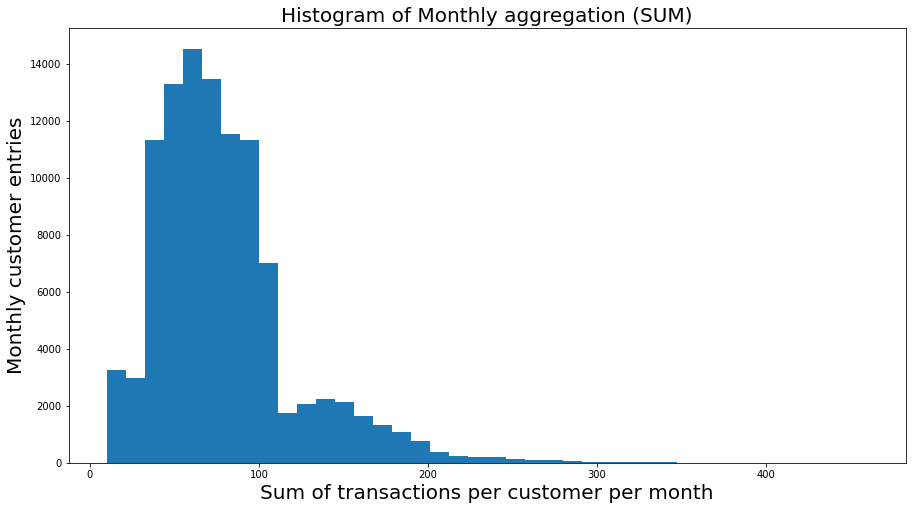

In [ ]:
#2.
clnt_monthly_aggregations.hist(column='mth_txn_amt_sum',bins=40,figsize=(15,8))
plt.title('Histogram of Monthly aggregation (SUM)',fontsize=20)
plt.xlabel('Sum of transactions per customer per month',fontsize=20)
plt.ylabel('Monthly customer entries',fontsize=20)
plt.grid()
plt.savefig('Fig_1.3.2_a_Desai_Ashutosh.png')

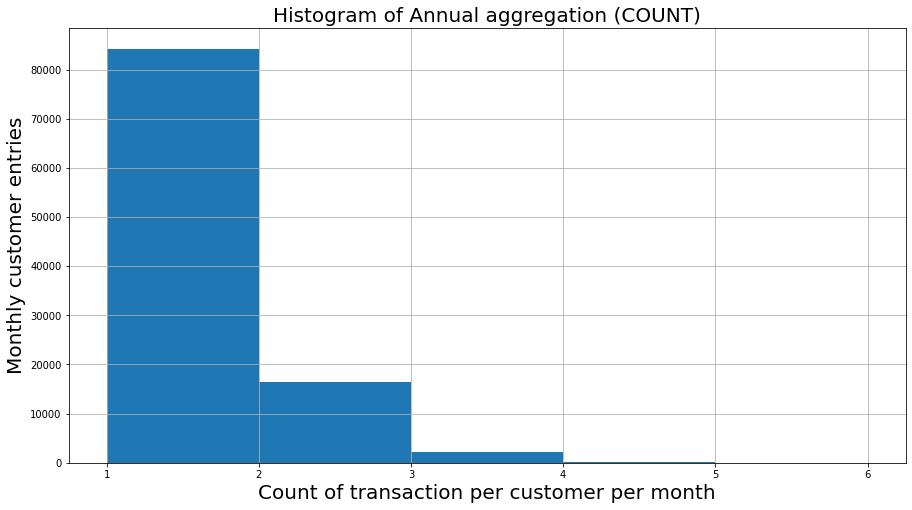

In [ ]:
clnt_monthly_aggregations.hist(column='mth_txn_amt_cnt',bins=5,figsize=(15,8))
plt.title('Histogram of Annual aggregation (COUNT)',fontsize=20)
plt.xlabel('Count of transaction per customer per month',fontsize=20)
plt.ylabel('Monthly customer entries',fontsize=20)
plt.savefig('Fig_1.3.2_b_Desai_Ashutosh.png')

The most common values in the 'SUM' column is in the range of 50 - 70 whereas, the maximum value is in the range of 320 - 350. The most common values in the 'COUNT' column is in the range 1 - 2 whereas, the maximum value is in the range of 4 - 5. Comparing the histograms to the ones in section 1.2, it can be observed that for both the plots the x-axis range is higher and the y-axis range is lower. This is merely because the month analysis increases the number of entries (counts) and reduces the value in those entries.

In [ ]:
clnt_monthly_aggregations.loc['CS1112']

,mth_txn_amt_sum,mth_txn_amt_cnt
ME_DT,,
2011-06-30,56,1
2011-08-31,96,1
2011-10-31,60,1
2012-04-30,56,1
2012-06-30,52,1
2012-07-31,81,1
2012-09-30,72,1
2012-12-31,76,1
2013-03-31,105,1


###1.4 Create the base table for the rolling window features

In [ ]:
#1.
unique_cust = set(txn['customer_id'])
unique_medt = set(txn['ME_DT'])

In [ ]:
print('Number of unique clients :',len(unique_cust))
print('Number of unique month-end-dates :',len(unique_medt))

Number of unique clients : 6889
Number of unique month-end-dates : 47


In [ ]:
#2.
from itertools import product
base_table = product(unique_cust,unique_medt)
type(base_table)

itertools.product

In [ ]:
#3.
base_table_pd = pd.DataFrame.from_records(base_table, columns=['CLNT_NO', 'ME_DT'])
base_table_pd

,CLNT_NO,ME_DT
0,CS4130,2013-07-31
1,CS4130,2014-01-31
2,CS4130,2013-08-31
3,CS4130,2014-09-30
4,CS4130,2012-04-30
...,...,...
323778,CS1468,2013-09-30
323779,CS1468,2014-03-31
323780,CS1468,2011-11-30
323781,CS1468,2013-10-31


In [ ]:
base_table_pd = base_table_pd.sort_values(by=['CLNT_NO','ME_DT']).reset_index().drop(columns=['index'])

In [ ]:
#4. Validation
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112']

,CLNT_NO,ME_DT
0,CS1112,2011-05-31
1,CS1112,2011-06-30
2,CS1112,2011-07-31
3,CS1112,2011-08-31
4,CS1112,2011-09-30
5,CS1112,2011-10-31
6,CS1112,2011-11-30
7,CS1112,2011-12-31
8,CS1112,2012-01-31
9,CS1112,2012-02-28


In [ ]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'].min()

CLNT_NO                 CS1112
ME_DT      2011-05-31 00:00:00
dtype: object

In [ ]:
base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'].max()

CLNT_NO                 CS1112
ME_DT      2015-03-31 00:00:00
dtype: object

In [ ]:
len(base_table_pd[base_table_pd['CLNT_NO'] == 'CS1112'])

47

1. 'CS1112' has 47 rows
2. 'base_table_pd' has 323783 rows
3. Dates fall between the min and max month-dates that were identified in section 1.1.

###1.5 Create the monthly rolling window features

In [ ]:
#1.
base_table_pd_copy = base_table_pd.copy()
base_table_pd_copy

,CLNT_NO,ME_DT
0,CS1112,2011-05-31
1,CS1112,2011-06-30
2,CS1112,2011-07-31
3,CS1112,2011-08-31
4,CS1112,2011-09-30
...,...,...
323778,CS9000,2014-11-30
323779,CS9000,2014-12-31
323780,CS9000,2015-01-31
323781,CS9000,2015-02-28


In [ ]:
base_clnt_mth = base_table_pd_copy.join(clnt_monthly_aggregations,how='left',on=['CLNT_NO','ME_DT'])
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS1112,2011-05-31,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,NaN,NaN
...,...,...,...,...
323778,CS9000,2014-11-30,NaN,NaN
323779,CS9000,2014-12-31,NaN,NaN
323780,CS9000,2015-01-31,NaN,NaN
323781,CS9000,2015-02-28,34.0,1.0


Q.1) Why do some rows have NaN values?

A.) Some rows have NaN values because the customer doesn't have a transaction during that particular month of that year.

Q.2) What values will you choose to impute NaN values in the  sum and count columns? Perform the imputation you suggest.

A.) I would choose the value '0' to impute the NaN values in the sum and count columns. This has been performed below.

In [ ]:
base_clnt_mth.fillna(value=0,inplace=True)
base_clnt_mth

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS1112,2011-05-31,0.0,0.0
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,0.0,0.0
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0
323781,CS9000,2015-02-28,34.0,1.0


Q.3) Confirm that the number of rows is what you expect. What is the value?

A.) The number of rows in the dataframe 'base_clnt_mth' is 323783 which is expected. 

Q.4) How are tables base clnt mth and clnt monthly aggregations different? Comment on the number of rows and the content of each table.

A.) The table 'clnt_monthly_aggregations' contains 103234 rows whereas, the table 'base_clnt_mth' contains 323783 rows. Each  entry in the table 'clnt_monthly_aggregations' contains the sum and count of transactions made by a particular customer in a particular month of that year. Whereas, the entries in table base_clnt_mth' contains all the months that any customer did any transaction. Thus, it possesses NaN values in cases where a customer does not have a transaction that month of the entry. Hence, number of rows in 'base_clnt_mth' is much greater than 'clnt_monthly_aggregations'.

In [ ]:
clnt_monthly_aggregations

mth_txn_amt_sum  mth_txn_amt_cnt
customer_id ME_DT                                       
CS1112      2011-06-30               56                1
            2011-08-31               96                1
            2011-10-31               60                1
            2012-04-30               56                1
            2012-06-30               52                1
...                                 ...              ...
CS9000      2014-01-31               16                1
            2014-05-31               20                1
            2014-07-31               26                1
            2014-08-31               35                1
            2015-02-28               34                1

[103234 rows x 2 columns]

In [ ]:
#2.
base_clnt_mth_sorted = base_clnt_mth.sort_values(by=['CLNT_NO', 'ME_DT'])
base_clnt_mth_sorted

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt
0,CS1112,2011-05-31,0.0,0.0
1,CS1112,2011-06-30,56.0,1.0
2,CS1112,2011-07-31,0.0,0.0
3,CS1112,2011-08-31,96.0,1.0
4,CS1112,2011-09-30,0.0,0.0
...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0
323781,CS9000,2015-02-28,34.0,1.0


In [ ]:
#3.
rolling_features_3M = base_clnt_mth_sorted.groupby('CLNT_NO').rolling(3).agg(
    {'mth_txn_amt_sum':['sum','mean','max'],
     'mth_txn_amt_cnt':['sum','mean','max']}
)
rolling_features_3M

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  0                  NaN        NaN   NaN             NaN       NaN  NaN
        1                  NaN        NaN   NaN             NaN       NaN  NaN
        2                 56.0  18.666667  56.0             1.0  0.333333  1.0
        3                152.0  50.666667  96.0             2.0  0.666667  1.0
        4                 96.0  32.000000  96.0             1.0  0.333333  1.0
...                        ...        ...   ...             ...       ...  ...
CS9000  323778             0.0   0.000000   0.0             0.0  0.000000  0.0
        323779             0.0   0.000000   0.0             0.0  0.000000  0.0
        323780             0.0   0.000000   0.0             0.0  0.000000  0.0
        323781            34.0  11.333333  34.0             1.0  0.333333  1.0
        323782            34.0  11.333333  34.0             1.0  0.333333  1.0

[323783 rows x 6 columns]

In [ ]:
rolling_features_6M = base_clnt_mth_sorted.groupby('CLNT_NO').rolling(6).agg(
    {'mth_txn_amt_sum':['sum','mean','max'],
     'mth_txn_amt_cnt':['sum','mean','max']}
)
rolling_features_6M

mth_txn_amt_sum                  mth_txn_amt_cnt               
                           sum       mean   max             sum      mean  max
CLNT_NO                                                                       
CS1112  0                  NaN        NaN   NaN             NaN       NaN  NaN
        1                  NaN        NaN   NaN             NaN       NaN  NaN
        2                  NaN        NaN   NaN             NaN       NaN  NaN
        3                  NaN        NaN   NaN             NaN       NaN  NaN
        4                  NaN        NaN   NaN             NaN       NaN  NaN
...                        ...        ...   ...             ...       ...  ...
CS9000  323778            61.0  10.166667  35.0             2.0  0.333333  1.0
        323779            61.0  10.166667  35.0             2.0  0.333333  1.0
        323780            35.0   5.833333  35.0             1.0  0.166667  1.0
        323781            34.0   5.666667  34.0             1.0  0.166667  1.0
        323782            34.0   5.666667  34.0             1.0  0.166667  1.0

[323783 rows x 6 columns]

In [ ]:
rolling_features_12M = base_clnt_mth_sorted.groupby('CLNT_NO').rolling(12).agg(
    {'mth_txn_amt_sum':['sum','mean','max'],
     'mth_txn_amt_cnt':['sum','mean','max']}
)
rolling_features_12M

mth_txn_amt_sum                 mth_txn_amt_cnt               
                           sum      mean   max             sum      mean  max
CLNT_NO                                                                      
CS1112  0                  NaN       NaN   NaN             NaN       NaN  NaN
        1                  NaN       NaN   NaN             NaN       NaN  NaN
        2                  NaN       NaN   NaN             NaN       NaN  NaN
        3                  NaN       NaN   NaN             NaN       NaN  NaN
        4                  NaN       NaN   NaN             NaN       NaN  NaN
...                        ...       ...   ...             ...       ...  ...
CS9000  323778            97.0  8.083333  35.0             4.0  0.333333  1.0
        323779            97.0  8.083333  35.0             4.0  0.333333  1.0
        323780            81.0  6.750000  35.0             3.0  0.250000  1.0
        323781           115.0  9.583333  35.0             4.0  0.333333  1.0
        323782           115.0  9.583333  35.0             4.0  0.333333  1.0

[323783 rows x 6 columns]

In [ ]:
rolling_features_3M.loc[pd.IndexSlice['CS1112',:],:]

mth_txn_amt_sum                   mth_txn_amt_cnt               
                       sum       mean    max             sum      mean  max
CLNT_NO                                                                    
CS1112  0              NaN        NaN    NaN             NaN       NaN  NaN
        1              NaN        NaN    NaN             NaN       NaN  NaN
        2             56.0  18.666667   56.0             1.0  0.333333  1.0
        3            152.0  50.666667   96.0             2.0  0.666667  1.0
        4             96.0  32.000000   96.0             1.0  0.333333  1.0
        5            156.0  52.000000   96.0             2.0  0.666667  1.0
        6             60.0  20.000000   60.0             1.0  0.333333  1.0
        7             60.0  20.000000   60.0             1.0  0.333333  1.0
        8              0.0   0.000000    0.0             0.0  0.000000  0.0
        9              0.0   0.000000    0.0             0.0  0.000000  0.0
        10             0.0   0.000000    0.0             0.0  0.000000  0.0
        11            56.0  18.666667   56.0             1.0  0.333333  1.0
        12            56.0  18.666667   56.0             1.0  0.333333  1.0
        13           108.0  36.000000   56.0             2.0  0.666667  1.0
        14           133.0  44.333333   81.0             2.0  0.666667  1.0
        15           133.0  44.333333   81.0             2.0  0.666667  1.0
        16           153.0  51.000000   81.0             2.0  0.666667  1.0
        17            72.0  24.000000   72.0             1.0  0.333333  1.0
        18            72.0  24.000000   72.0             1.0  0.333333  1.0
        19            76.0  25.333333   76.0             1.0  0.333333  1.0
        20            76.0  25.333333   76.0             1.0  0.333333  1.0
        21            76.0  25.333333   76.0             1.0  0.333333  1.0
        22           105.0  35.000000  105.0             1.0  0.333333  1.0
        23           105.0  35.000000  105.0             1.0  0.333333  1.0
        24           105.0  35.000000  105.0             1.0  0.333333  1.0
        25             0.0   0.000000    0.0             0.0  0.000000  0.0
        26            36.0  12.000000   36.0             1.0  0.333333  1.0
        27            36.0  12.000000   36.0             1.0  0.333333  1.0
        28            36.0  12.000000   36.0             1.0  0.333333  1.0
        29             0.0   0.000000    0.0             0.0  0.000000  0.0
        30            71.0  23.666667   71.0             1.0  0.333333  1.0
        31            71.0  23.666667   71.0             1.0  0.333333  1.0
        32            71.0  23.666667   71.0             1.0  0.333333  1.0
        33             0.0   0.000000    0.0             0.0  0.000000  0.0
        34             0.0   0.000000    0.0             0.0  0.000000  0.0
        35            63.0  21.000000   63.0             1.0  0.333333  1.0
        36            63.0  21.000000   63.0             1.0  0.333333  1.0
        37            63.0  21.000000   63.0             1.0  0.333333  1.0
        38            90.0  30.000000   90.0             1.0  0.333333  1.0
        39            90.0  30.000000   90.0             1.0  0.333333  1.0
        40            90.0  30.000000   90.0             1.0  0.333333  1.0
        41             0.0   0.000000    0.0             0.0  0.000000  0.0
        42             0.0   0.000000    0.0             0.0  0.000000  0.0
        43            59.0  19.666667   59.0             1.0  0.333333  1.0
        44            98.0  32.666667   59.0             2.0  0.666667  1.0
        45            98.0  32.666667   59.0             2.0  0.666667  1.0
        46            39.0  13.000000   39.0             1.0  0.333333  1.0

In [ ]:
rolling_features_6M.loc[pd.IndexSlice['CS1112',:],:]

mth_txn_amt_sum                   mth_txn_amt_cnt               
                       sum       mean    max             sum      mean  max
CLNT_NO                                                                    
CS1112  0              NaN        NaN    NaN             NaN       NaN  NaN
        1              NaN        NaN    NaN             NaN       NaN  NaN
        2              NaN        NaN    NaN             NaN       NaN  NaN
        3              NaN        NaN    NaN             NaN       NaN  NaN
        4              NaN        NaN    NaN             NaN       NaN  NaN
        5            212.0  35.333333   96.0             3.0  0.500000  1.0
        6            212.0  35.333333   96.0             3.0  0.500000  1.0
        7            156.0  26.000000   96.0             2.0  0.333333  1.0
        8            156.0  26.000000   96.0             2.0  0.333333  1.0
        9             60.0  10.000000   60.0             1.0  0.166667  1.0
        10            60.0  10.000000   60.0             1.0  0.166667  1.0
        11            56.0   9.333333   56.0             1.0  0.166667  1.0
        12            56.0   9.333333   56.0             1.0  0.166667  1.0
        13           108.0  18.000000   56.0             2.0  0.333333  1.0
        14           189.0  31.500000   81.0             3.0  0.500000  1.0
        15           189.0  31.500000   81.0             3.0  0.500000  1.0
        16           261.0  43.500000   81.0             4.0  0.666667  1.0
        17           205.0  34.166667   81.0             3.0  0.500000  1.0
        18           205.0  34.166667   81.0             3.0  0.500000  1.0
        19           229.0  38.166667   81.0             3.0  0.500000  1.0
        20           148.0  24.666667   76.0             2.0  0.333333  1.0
        21           148.0  24.666667   76.0             2.0  0.333333  1.0
        22           181.0  30.166667  105.0             2.0  0.333333  1.0
        23           181.0  30.166667  105.0             2.0  0.333333  1.0
        24           181.0  30.166667  105.0             2.0  0.333333  1.0
        25           105.0  17.500000  105.0             1.0  0.166667  1.0
        26           141.0  23.500000  105.0             2.0  0.333333  1.0
        27           141.0  23.500000  105.0             2.0  0.333333  1.0
        28            36.0   6.000000   36.0             1.0  0.166667  1.0
        29            36.0   6.000000   36.0             1.0  0.166667  1.0
        30           107.0  17.833333   71.0             2.0  0.333333  1.0
        31           107.0  17.833333   71.0             2.0  0.333333  1.0
        32            71.0  11.833333   71.0             1.0  0.166667  1.0
        33            71.0  11.833333   71.0             1.0  0.166667  1.0
        34            71.0  11.833333   71.0             1.0  0.166667  1.0
        35           134.0  22.333333   71.0             2.0  0.333333  1.0
        36            63.0  10.500000   63.0             1.0  0.166667  1.0
        37            63.0  10.500000   63.0             1.0  0.166667  1.0
        38           153.0  25.500000   90.0             2.0  0.333333  1.0
        39           153.0  25.500000   90.0             2.0  0.333333  1.0
        40           153.0  25.500000   90.0             2.0  0.333333  1.0
        41            90.0  15.000000   90.0             1.0  0.166667  1.0
        42            90.0  15.000000   90.0             1.0  0.166667  1.0
        43           149.0  24.833333   90.0             2.0  0.333333  1.0
        44            98.0  16.333333   59.0             2.0  0.333333  1.0
        45            98.0  16.333333   59.0             2.0  0.333333  1.0
        46            98.0  16.333333   59.0             2.0  0.333333  1.0

In [ ]:
rolling_features_12M.loc[pd.IndexSlice['CS1112',:],:]

mth_txn_amt_sum                   mth_txn_amt_cnt               
                       sum       mean    max             sum      mean  max
CLNT_NO                                                                    
CS1112  0              NaN        NaN    NaN             NaN       NaN  NaN
        1              NaN        NaN    NaN             NaN       NaN  NaN
        2              NaN        NaN    NaN             NaN       NaN  NaN
        3              NaN        NaN    NaN             NaN       NaN  NaN
        4              NaN        NaN    NaN             NaN       NaN  NaN
        5              NaN        NaN    NaN             NaN       NaN  NaN
        6              NaN        NaN    NaN             NaN       NaN  NaN
        7              NaN        NaN    NaN             NaN       NaN  NaN
        8              NaN        NaN    NaN             NaN       NaN  NaN
        9              NaN        NaN    NaN             NaN       NaN  NaN
        10             NaN        NaN    NaN             NaN       NaN  NaN
        11           268.0  22.333333   96.0             4.0  0.333333  1.0
        12           268.0  22.333333   96.0             4.0  0.333333  1.0
        13           264.0  22.000000   96.0             4.0  0.333333  1.0
        14           345.0  28.750000   96.0             5.0  0.416667  1.0
        15           249.0  20.750000   81.0             4.0  0.333333  1.0
        16           321.0  26.750000   81.0             5.0  0.416667  1.0
        17           261.0  21.750000   81.0             4.0  0.333333  1.0
        18           261.0  21.750000   81.0             4.0  0.333333  1.0
        19           337.0  28.083333   81.0             5.0  0.416667  1.0
        20           337.0  28.083333   81.0             5.0  0.416667  1.0
        21           337.0  28.083333   81.0             5.0  0.416667  1.0
        22           442.0  36.833333  105.0             6.0  0.500000  1.0
        23           386.0  32.166667  105.0             5.0  0.416667  1.0
        24           386.0  32.166667  105.0             5.0  0.416667  1.0
        25           334.0  27.833333  105.0             4.0  0.333333  1.0
        26           289.0  24.083333  105.0             4.0  0.333333  1.0
        27           289.0  24.083333  105.0             4.0  0.333333  1.0
        28           217.0  18.083333  105.0             3.0  0.250000  1.0
        29           217.0  18.083333  105.0             3.0  0.250000  1.0
        30           288.0  24.000000  105.0             4.0  0.333333  1.0
        31           212.0  17.666667  105.0             3.0  0.250000  1.0
        32           212.0  17.666667  105.0             3.0  0.250000  1.0
        33           212.0  17.666667  105.0             3.0  0.250000  1.0
        34           107.0   8.916667   71.0             2.0  0.166667  1.0
        35           170.0  14.166667   71.0             3.0  0.250000  1.0
        36           170.0  14.166667   71.0             3.0  0.250000  1.0
        37           170.0  14.166667   71.0             3.0  0.250000  1.0
        38           224.0  18.666667   90.0             3.0  0.250000  1.0
        39           224.0  18.666667   90.0             3.0  0.250000  1.0
        40           224.0  18.666667   90.0             3.0  0.250000  1.0
        41           224.0  18.666667   90.0             3.0  0.250000  1.0
        42           153.0  12.750000   90.0             2.0  0.166667  1.0
        43           212.0  17.666667   90.0             3.0  0.250000  1.0
        44           251.0  20.916667   90.0             4.0  0.333333  1.0
        45           251.0  20.916667   90.0             4.0  0.333333  1.0
        46           251.0  20.916667   90.0             4.0  0.333333  1.0

Q.1) How many rows appear with NaN values at the beginning of each client for 3, 6 and 12-month windows, respectively? Why do they appear?

A.) 2,5 and 11 rows of NaN values appear at the beginning of each client for 3, 6 and 12-month windows, respectively. In case of 3-month windows, the **rolling** function calculates the sum, mean or max of 3 consecutive values of 'mth_txn_amt_sum' or 'mth_txn_amt_cnt' and stores it at the third place of the sum, mean or max column. This activity is performed for each row. For example, for the 'sum' rolling function, takes the sum of 1st, 2nd and 3rd row value and stores it in the 3rd row of the sum column. In the second step, the 'sum' rolling function, takes the sum of 2nd, 3rd and 4th row value and stores it in the 4th row of the sum column. Thus, the first 2 rows of the sum, mean or max column are NaN values. Similarly, in case of 6-month rolling windows, there are 5 row NaN values and 11 row NaN values for 12-month rolling windows.

In [ ]:
rolling_features_3M.index.nlevels

2

In [ ]:
rolling_features_3M.columns.nlevels

2

Q.2) How many levels do the index and columns have? Are these MultiIndex dataframes?

A.) Index and columns, both have **2** levels. yes, they are MultiIndex dataframes

In [ ]:
#Renaming the columns of the dataframes
#For 3M
level_0_3M = rolling_features_3M.columns.get_level_values(0).astype(str)
level_1_3M = rolling_features_3M.columns.get_level_values(1).astype(str)

col_name_3M = []
for i in range(0,len(level_0_3M)):
  temp_list = []
  temp_list = level_0_3M[i].split('_')
  if 'sum' in temp_list:
    name = temp_list[2]+'_'+level_1_3M[i]+'_'+'3M'
  else:
    name = temp_list[1]+'_'+temp_list[3]+'_'+level_1_3M[i]+'_'+'3M'
  col_name_3M.append(name)

rolling_features_3M.columns = col_name_3M

In [ ]:
#For 6M
level_0_6M = rolling_features_6M.columns.get_level_values(0).astype(str)
level_1_6M = rolling_features_6M.columns.get_level_values(1).astype(str)

col_name_6M = []
for i in range(0,len(level_0_6M)):
  temp_list = []
  temp_list = level_0_6M[i].split('_')
  if 'sum' in temp_list:
    name = temp_list[2]+'_'+level_1_6M[i]+'_'+'6M'
  else:
    name = temp_list[1]+'_'+temp_list[3]+'_'+level_1_6M[i]+'_'+'6M'
  col_name_6M.append(name)

rolling_features_6M.columns = col_name_6M

In [ ]:
#For 12M
level_0_12M = rolling_features_12M.columns.get_level_values(0).astype(str)
level_1_12M = rolling_features_12M.columns.get_level_values(1).astype(str)

col_name_12M = []
for i in range(0,len(level_0_12M)):
  temp_list = []
  temp_list = level_0_12M[i].split('_')
  if 'sum' in temp_list:
    name = temp_list[2]+'_'+level_1_12M[i]+'_'+'12M'
  else:
    name = temp_list[1]+'_'+temp_list[3]+'_'+level_1_12M[i]+'_'+'12M'
  col_name_12M.append(name)

rolling_features_12M.columns = col_name_12M

In [ ]:
#4.
rolling_features_3M_drop_level = rolling_features_3M.droplevel(0,axis=0)
rolling_features_6M_drop_level = rolling_features_6M.droplevel(0,axis=0)
rolling_features_12M_drop_level = rolling_features_12M.droplevel(0,axis=0)

In [ ]:
all_rolling_features = base_clnt_mth_sorted.merge(rolling_features_3M_drop_level,left_index=True,right_index=True).merge(rolling_features_6M_drop_level,left_index=True,right_index=True).merge(rolling_features_12M_drop_level,left_index=True,right_index=True)

In [ ]:
all_rolling_features

,CLNT_NO,ME_DT,mth_txn_amt_sum,mth_txn_amt_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,txn_cnt_max_3M,amt_sum_6M,amt_mean_6M,amt_max_6M,txn_cnt_sum_6M,txn_cnt_mean_6M,txn_cnt_max_6M,amt_sum_12M,amt_mean_12M,amt_max_12M,txn_cnt_sum_12M,txn_cnt_mean_12M,txn_cnt_max_12M
0,CS1112,2011-05-31,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,56.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CS1112,2011-07-31,0.0,0.0,56.0,18.666667,56.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,96.0,1.0,152.0,50.666667,96.0,2.0,0.666667,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CS1112,2011-09-30,0.0,0.0,96.0,32.000000,96.0,1.0,0.333333,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,61.0,10.166667,35.0,2.0,0.333333,1.0,97.0,8.083333,35.0,4.0,0.333333,1.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,35.0,5.833333,35.0,1.0,0.166667,1.0,81.0,6.750000,35.0,3.0,0.250000,1.0
323781,CS9000,2015-02-28,34.0,1.0,34.0,11.333333,34.0,1.0,0.333333,1.0,34.0,5.666667,34.0,1.0,0.166667,1.0,115.0,9.583333,35.0,4.0,0.333333,1.0


In [ ]:
#5.
all_rolling_features.to_excel("mth_rolling_features.xlsx")

'all_rolling_features' table has 323783 rows and 22 columns

###1.6 Date-related features: date of the week

In [ ]:
#1.
txn['day_of_the_week'] = txn['txn_date'].dt.dayofweek
txn['day_name'] = txn['txn_date'].dt.day_name()
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


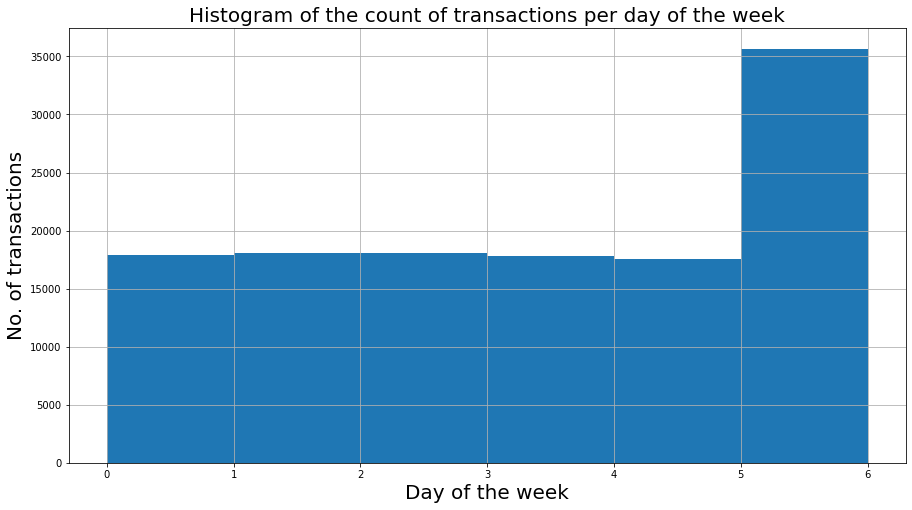

In [ ]:
#2.
txn.hist(column='day_of_the_week',bins=6,figsize=(15,8))
plt.title('Histogram of the count of transactions per day of the week',fontsize=20)
plt.xlabel('Day of the week',fontsize=20)
plt.ylabel('No. of transactions',fontsize=20)
plt.savefig('Fig_1.6.2_Desai_Ashutosh.png')

In [ ]:
#3.
count_annual_dow = txn.groupby(['customer_id','YEAR','day_name']).agg(
    cnt=pd.NamedAgg(column="tran_amount", aggfunc='count'),
)

In [ ]:
count_annual_dow

cnt
customer_id YEAR day_name      
CS1112      2011 Friday       1
                 Sunday       1
                 Wednesday    1
            2012 Saturday     1
                 Sunday       3
...                         ...
CS9000      2013 Tuesday      1
            2014 Sunday       2
                 Thursday     1
                 Tuesday      1
            2015 Saturday     1

[93736 rows x 1 columns]

In [ ]:
count_annual_dow.reset_index(inplace=True)

In [ ]:
count_annual_dow_table = count_annual_dow.pivot_table(index='customer_id', columns=['YEAR','day_name'],dropna=False,fill_value=0)
count_annual_dow_table

cnt                         ...                                  
YEAR          2011                         ...   2015                           
day_name    Friday Monday Saturday Sunday  ... Sunday Thursday Tuesday Wednesday
customer_id                                ...                                  
CS1112           1      0        0      1  ...      0        0       0         1
CS1113           1      1        0      1  ...      0        0       0         1
CS1114           0      1        0      1  ...      0        1       0         0
CS1115           0      0        1      1  ...      0        1       0         0
CS1116           1      1        0      0  ...      0        0       0         0
...            ...    ...      ...    ...  ...    ...      ...     ...       ...
CS8996           0      1        0      0  ...      0        0       0         0
CS8997           0      0        0      0  ...      0        0       0         0
CS8998           0      0        0      0  ...      0        0       0         0
CS8999           0      1        1      0  ...      0        0       0         0
CS9000           0      0        0      2  ...      0        0       0         0

[6889 rows x 35 columns]

In [ ]:
count_annual_dow_table.columns

MultiIndex([('cnt', 2011,    'Friday'),
            ('cnt', 2011,    'Monday'),
            ('cnt', 2011,  'Saturday'),
            ('cnt', 2011,    'Sunday'),
            ('cnt', 2011,  'Thursday'),
            ('cnt', 2011,   'Tuesday'),
            ('cnt', 2011, 'Wednesday'),
            ('cnt', 2012,    'Friday'),
            ('cnt', 2012,    'Monday'),
            ('cnt', 2012,  'Saturday'),
            ('cnt', 2012,    'Sunday'),
            ('cnt', 2012,  'Thursday'),
            ('cnt', 2012,   'Tuesday'),
            ('cnt', 2012, 'Wednesday'),
            ('cnt', 2013,    'Friday'),
            ('cnt', 2013,    'Monday'),
            ('cnt', 2013,  'Saturday'),
            ('cnt', 2013,    'Sunday'),
            ('cnt', 2013,  'Thursday'),
            ('cnt', 2013,   'Tuesday'),
            ('cnt', 2013, 'Wednesday'),
            ('cnt', 2014,    'Friday'),
            ('cnt', 2014,    'Monday'),
            ('cnt', 2014,  'Saturday'),
            ('cnt', 2014,    'Sunday'),


In [ ]:
level_0_dow = count_annual_dow_table.columns.get_level_values(0).astype(str)
level_1_dow = count_annual_dow_table.columns.get_level_values(1).astype(str)
level_2_dow = count_annual_dow_table.columns.get_level_values(2).astype(str)
count_annual_dow_table.columns = level_0_dow + '_' + level_1_dow+'_'+level_2_dow
count_annual_dow_table

,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,cnt_2012_Saturday,cnt_2012_Sunday,cnt_2012_Thursday,cnt_2012_Tuesday,cnt_2012_Wednesday,cnt_2013_Friday,cnt_2013_Monday,cnt_2013_Saturday,cnt_2013_Sunday,cnt_2013_Thursday,cnt_2013_Tuesday,cnt_2013_Wednesday,cnt_2014_Friday,cnt_2014_Monday,cnt_2014_Saturday,cnt_2014_Sunday,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CS1112,1,0,0,1,0,0,1,0,0,1,3,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1
CS1113,1,1,0,1,0,0,0,2,1,0,0,0,1,1,0,1,1,0,0,2,1,0,0,1,0,0,3,0,0,2,0,0,0,0,1
CS1114,0,1,0,1,1,0,2,0,0,1,1,0,0,0,0,1,0,1,2,0,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0
CS1115,0,0,1,1,0,0,1,1,1,0,2,1,1,1,0,1,2,0,2,0,2,0,0,0,0,2,0,2,0,0,0,0,1,0,0
CS1116,1,1,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS8996,0,1,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,1,1,2,0,0,0,0,0,0,0
CS8997,0,0,0,0,1,0,1,1,2,0,0,1,0,0,1,1,1,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
CS8998,0,0,0,0,0,1,1,2,0,0,0,1,1,1,2,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0


It is confirmed that the number of rows of the final output of section 1.2 is the same as the 'count_annual_dow_table'

In [ ]:
#4.
count_annual_dow_table.to_excel("annual_day_of_week_counts_pivot.xlsx")

**35** columns/features were created in section 1.6

In [ ]:
#5.
count_monthly_dow = txn.groupby(['customer_id','ME_DT','day_name']).agg(
    cnt=pd.NamedAgg(column="tran_amount", aggfunc='count'),
)

count_monthly_dow

cnt
customer_id ME_DT      day_name      
CS1112      2011-06-30 Wednesday    1
            2011-08-31 Friday       1
            2011-10-31 Sunday       1
            2012-04-30 Sunday       1
            2012-06-30 Sunday       1
...                               ...
CS9000      2014-01-31 Sunday       1
            2014-05-31 Thursday     1
            2014-07-31 Tuesday      1
            2014-08-31 Sunday       1
            2015-02-28 Saturday     1

[121512 rows x 1 columns]

In [ ]:
count_monthly_dow.reset_index(inplace=True)

In [ ]:
count_monthly_dow_table = count_monthly_dow.pivot_table(index=['customer_id','ME_DT'], columns=['day_name'],dropna=True,fill_value=0)
count_monthly_dow_table

cnt                                                  
day_name               Friday Monday Saturday Sunday Thursday Tuesday Wednesday
customer_id ME_DT                                                              
CS1112      2011-06-30      0      0        0      0        0       0         1
            2011-08-31      1      0        0      0        0       0         0
            2011-10-31      0      0        0      1        0       0         0
            2012-04-30      0      0        0      1        0       0         0
            2012-06-30      0      0        0      1        0       0         0
...                       ...    ...      ...    ...      ...     ...       ...
CS9000      2014-01-31      0      0        0      1        0       0         0
            2014-05-31      0      0        0      0        1       0         0
            2014-07-31      0      0        0      0        0       1         0
            2014-08-31      0      0        0      1        0       0         0
            2015-02-28      0      0        1      0        0       0         0

[103234 rows x 7 columns]

In [ ]:
level_0_dow_m = count_monthly_dow_table.columns.get_level_values(0).astype(str)
level_1_dow_m = count_monthly_dow_table.columns.get_level_values(1).astype(str)

count_monthly_dow_table.columns = level_0_dow_m + '_' + level_1_dow_m
count_monthly_dow_table

cnt_Friday  cnt_Monday  ...  cnt_Tuesday  cnt_Wednesday
customer_id ME_DT                               ...                            
CS1112      2011-06-30           0           0  ...            0              1
            2011-08-31           1           0  ...            0              0
            2011-10-31           0           0  ...            0              0
            2012-04-30           0           0  ...            0              0
            2012-06-30           0           0  ...            0              0
...                            ...         ...  ...          ...            ...
CS9000      2014-01-31           0           0  ...            0              0
            2014-05-31           0           0  ...            0              0
            2014-07-31           0           0  ...            1              0
            2014-08-31           0           0  ...            0              0
            2015-02-28           0           0  ...            0              0

[103234 rows x 7 columns]

In [ ]:
#6.
base_table_pd_copy = base_table_pd.copy()

In [ ]:
base_clnt_day = base_table_pd_copy.join(count_monthly_dow_table,how='left',on=['CLNT_NO','ME_DT'])
base_clnt_day

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CS1112,2011-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS1112,2011-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323779,CS9000,2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323780,CS9000,2015-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323781,CS9000,2015-02-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
base_clnt_day.fillna(value=0,inplace=True)
base_clnt_day

,CLNT_NO,ME_DT,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday
0,CS1112,2011-05-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,CS1112,2011-06-30,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,CS1112,2011-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CS1112,2011-08-31,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,CS1112,2011-09-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
323778,CS9000,2014-11-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323779,CS9000,2014-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323780,CS9000,2015-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
323781,CS9000,2015-02-28,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
base_clnt_day.to_excel("mth_day_counts.xlsx")

###1.7 Date-related features: days since last transaction

In [ ]:
#1.
txn

,customer_id,tran_amount,txn_date,ME_DT,YEAR,day_of_the_week,day_name
0,CS5295,35,2013-02-11,2013-02-28,2013,0,Monday
1,CS4768,39,2015-03-15,2015-03-31,2015,6,Sunday
2,CS2122,52,2013-02-26,2013-02-28,2013,1,Tuesday
3,CS1217,99,2011-11-16,2011-11-30,2011,2,Wednesday
4,CS1850,78,2013-11-20,2013-11-30,2013,2,Wednesday
...,...,...,...,...,...,...,...
124995,CS8433,64,2011-06-26,2011-06-30,2011,6,Sunday
124996,CS7232,38,2014-08-19,2014-08-31,2014,1,Tuesday
124997,CS8731,42,2014-11-28,2014-11-30,2014,4,Friday
124998,CS8133,13,2013-12-14,2013-12-31,2013,5,Saturday


In [ ]:
last_monthly_purchase = txn.groupby(['customer_id','ME_DT']).agg(
    last_day_purchase_of_month=pd.NamedAgg(column="txn_date", aggfunc='max'),
)

last_monthly_purchase

last_day_purchase_of_month
customer_id ME_DT                                
CS1112      2011-06-30                 2011-06-15
            2011-08-31                 2011-08-19
            2011-10-31                 2011-10-02
            2012-04-30                 2012-04-08
            2012-06-30                 2012-06-24
...                                           ...
CS9000      2014-01-31                 2014-01-12
            2014-05-31                 2014-05-08
            2014-07-31                 2014-07-08
            2014-08-31                 2014-08-24
            2015-02-28                 2015-02-28

[103234 rows x 1 columns]

In [ ]:
#2.
base_table_pd_copy = base_table_pd.copy()
last_monthly_purchase_base = base_table_pd_copy.join(last_monthly_purchase,how='left',on=['CLNT_NO','ME_DT'])
last_monthly_purchase_base.sort_values(by=['CLNT_NO', 'ME_DT'],inplace=True)

In [ ]:
last_monthly_purchase_base[last_monthly_purchase_base['CLNT_NO'] == 'CS1112']

,CLNT_NO,ME_DT,last_day_purchase_of_month
0,CS1112,2011-05-31,NaT
1,CS1112,2011-06-30,2011-06-15
2,CS1112,2011-07-31,NaT
3,CS1112,2011-08-31,2011-08-19
4,CS1112,2011-09-30,NaT
5,CS1112,2011-10-31,2011-10-02
6,CS1112,2011-11-30,NaT
7,CS1112,2011-12-31,NaT
8,CS1112,2012-01-31,NaT
9,CS1112,2012-02-28,NaT


In [ ]:
#3.
last_monthly_purchase_base_fill = last_monthly_purchase_base.groupby(['CLNT_NO']).apply(lambda x: x.ffill())

In [ ]:
last_monthly_purchase_base_fill[last_monthly_purchase_base_fill['CLNT_NO'] == 'CS1114']

,CLNT_NO,ME_DT,last_day_purchase_of_month
94,CS1114,2011-05-31,NaT
95,CS1114,2011-06-30,NaT
96,CS1114,2011-07-31,2011-07-14
97,CS1114,2011-08-31,2011-08-24
98,CS1114,2011-09-30,2011-09-19
99,CS1114,2011-10-31,2011-09-19
100,CS1114,2011-11-30,2011-09-19
101,CS1114,2011-12-31,2011-09-19
102,CS1114,2012-01-31,2011-09-19
103,CS1114,2012-02-28,2011-09-19


In [ ]:
#4.
last_monthly_purchase_base_fill['days_since_last_txn'] = (last_monthly_purchase_base_fill['ME_DT'] - last_monthly_purchase_base_fill['last_day_purchase_of_month']).dt.days

In [ ]:
last_monthly_purchase_base_fill

,CLNT_NO,ME_DT,last_day_purchase_of_month,days_since_last_txn
0,CS1112,2011-05-31,NaT,NaN
1,CS1112,2011-06-30,2011-06-15,15.0
2,CS1112,2011-07-31,2011-06-15,46.0
3,CS1112,2011-08-31,2011-08-19,12.0
4,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
323778,CS9000,2014-11-30,2014-08-24,98.0
323779,CS9000,2014-12-31,2014-08-24,129.0
323780,CS9000,2015-01-31,2014-08-24,160.0
323781,CS9000,2015-02-28,2015-02-28,0.0


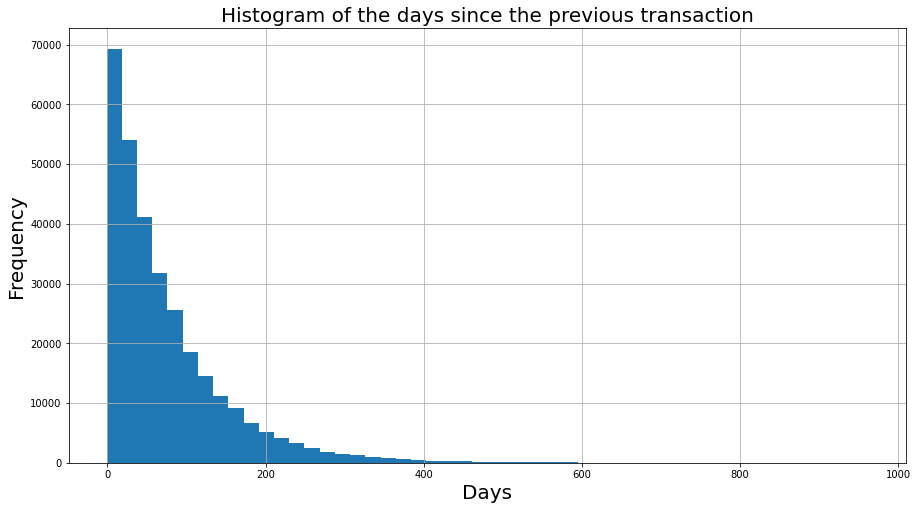

In [ ]:
#5. Histogram plot
last_monthly_purchase_base_fill.hist(column='days_since_last_txn',bins=50,figsize=(15,8))
plt.title('Histogram of the days since the previous transaction',fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.savefig('Fig_1.7.5_Desai_Ashutosh.png')

In [ ]:
last_monthly_purchase_base_fill

,CLNT_NO,ME_DT,last_day_purchase_of_month,days_since_last_txn
0,CS1112,2011-05-31,NaT,NaN
1,CS1112,2011-06-30,2011-06-15,15.0
2,CS1112,2011-07-31,2011-06-15,46.0
3,CS1112,2011-08-31,2011-08-19,12.0
4,CS1112,2011-09-30,2011-08-19,42.0
...,...,...,...,...
323778,CS9000,2014-11-30,2014-08-24,98.0
323779,CS9000,2014-12-31,2014-08-24,129.0
323780,CS9000,2015-01-31,2014-08-24,160.0
323781,CS9000,2015-02-28,2015-02-28,0.0


In [ ]:
last_monthly_purchase_base_fill.fillna(value=-10,inplace=True)

In [ ]:
last_monthly_purchase_base_fill = last_monthly_purchase_base_fill.sort_values(by=['CLNT_NO', 'ME_DT'])

In [ ]:
last_monthly_purchase_base_fill.drop(columns=['last_day_purchase_of_month'],inplace=True)

In [ ]:
last_monthly_purchase_base_fill

,CLNT_NO,ME_DT,days_since_last_txn
0,CS1112,2011-05-31,-10.0
1,CS1112,2011-06-30,15.0
2,CS1112,2011-07-31,46.0
3,CS1112,2011-08-31,12.0
4,CS1112,2011-09-30,42.0
...,...,...,...
323778,CS9000,2014-11-30,98.0
323779,CS9000,2014-12-31,129.0
323780,CS9000,2015-01-31,160.0
323781,CS9000,2015-02-28,0.0


In [ ]:
last_monthly_purchase_base_fill.to_excel("days_since_last_txn.xlsx")